# Table of Contents

# 1.Importing Packages

In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import nlpaug.augmenter.char as nac

from nltk.corpus import stopwords
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer
from wordcloud import WordCloud
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

In [97]:
pip install xgboost

# 2.Loading the Data

In [42]:
train_df = pd.read_csv('train_set.csv')

In [43]:
test_df = pd.read_csv('test_set.csv')

In [114]:
X = train_df['text']
y = train_df['lang_id']

# 3.Exploratory Data Analysis (EDA)

In [44]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB


In [45]:
train_df.describe()

,lang_id,text
count,33000,33000
unique,11,29948
top,xho,ngokwesekhtjheni yomthetho ophathelene nalokhu...
freq,3000,17


In [46]:
train_df.shape

(33000, 2)

In [47]:
train_df.dtypes

lang_id    object
text       object
dtype: object

In [48]:
for col in train_df.columns:
    print (col, len(train_df[col].unique()),train_df[col])

lang_id 11 0        xho
1        xho
2        eng
3        nso
4        ven
        ... 
32995    tsn
32996    sot
32997    eng
32998    xho
32999    sot
Name: lang_id, Length: 33000, dtype: object
text 29948 0        umgaqo-siseko wenza amalungiselelo kumaziko ax...
1        i-dha iya kuba nobulumko bokubeka umsebenzi na...
2        the province of kwazulu-natal department of tr...
3        o netefatša gore o ba file dilo ka moka tše le...
4        khomishini ya ndinganyiso ya mbeu yo ewa maana...
                               ...                        
32995    popo ya dipolateforomo tse ke go tlisa boetele...
32996    modise mosadi na o ntse o sa utlwe hore thaban...
32997    closing date for the submission of completed t...
32998    nawuphina umntu ofunyenwe enetyala phantsi kwa...
32999    mafapha a mang le ona a lokela ho etsa ditlale...
Name: text, Length: 33000, dtype: object


In [54]:
# Assuming you have a DataFrame named 'df' with object data type column(s)

# Display the count of unique values
unique_values_count = train_df['text'].nunique()
print(f"Number of unique values: {unique_values_count}")

Number of unique values: 29948


In [55]:
# Display the most common values and their frequencies
top_values = train_df['text'].value_counts().head()
print(f"Top 5 values and their frequencies:\n{top_values}")

Top 5 values and their frequencies:
ngokwesekhtjheni yomthetho ophathelene nalokhu unelungelo lokudlulisela isililo sakho kusomkhandlu wezehlalakuhle ngokutlola incwadi uyithumele e-adresini elandelako kungakapheli amalanga amatjhumi alithoba ukusukela mhlazana uthola incwadi le                                               17
ukubhalelwa kuzalisa iimfuneko zomthetho ophathelene nalokhu kungawufelelisa umrholwakho naweqisa iinyanga ezintathu ngokulandelana ungawuthathi umrholwakho nakhona uzakufelela umrholo owuthole ngokungakafaneli kufuze uwubuyise                                                               14
imali osalele ngayo emva nayo seyifakiwe emrholweni wakho wokuthoma nakungenzeka ukuthi imali le ibe yinengi ukudlula isilinganiso sephrovinsi yangekhenu izakuhlukaniswa ngeenyanga eziimbadlwana malungana nalokhu thintana ne-ofisi yezehlalakuhle yangekhenu nawufuna eminye imininingwana    13
sibawa abafakazeli ababili esingakghona ukubathola umrholi womphakathi kunye nesikghw

In [56]:
# Display summary statistics for the object column
summary_stats = df['text'].describe()
print(f"\nSummary Statistics:\n{summary_stats}")



Summary Statistics:
count                                                 33000
unique                                                29948
top       ngokwesekhtjheni yomthetho ophathelene nalokhu...
freq                                                     17
Name: text, dtype: object


In [62]:
# Assuming you have a DataFrame named 'df' with a text column named 'text'

# Combine all text into a single string
all_text = ' '.join(train_df['text'])

# Tokenize the text into words
words = all_text.split()

# Count the frequency of each word
word_freq = Counter(words)

# Display the top N most common words
top_words = word_freq.most_common(10)  # Change 10 to the desired number of top words
print(f"Top 10 most common words:\n{top_words}")


Top 10 most common words:
[('ya', 28237), ('a', 21233), ('le', 21050), ('ka', 17960), ('go', 17099), ('e', 15620), ('na', 11172), ('u', 10151), ('die', 10055), ('wa', 10021)]


In [74]:
# Download the stopwords for English
nltk.download('stopwords')
nltk.download('punkt')
# Replace 'text' with the actual name of your text column

# Combine all text into a single string
all_text = ' '.join(train_df['text'])

# Tokenize the text into words
words = all_text.split()

# Remove English stopwords
stopwords_set = set(stopwords.words('english'))

# Add stopwords for the official languages of South Africa
south_african_stopwords = [
    'af', 'en', 'zu', 'xh', 'st', 'tn', 'nr', 've', 'ts', 'ss', 'nso'
]

stopwords_set.update(south_african_stopwords)

# Remove stopwords from the text
filtered_words = [word for word in words if word.lower() not in stopwords_set]


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mohau\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Mohau\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [75]:
# Cell 5: Word Frequency Analysis
word_freq = Counter(filtered_words)

# Display the most common words and their frequencies
word_freq.most_common(10)

[('ya', 28237),
 ('le', 21050),
 ('ka', 17960),
 ('go', 17099),
 ('e', 15620),
 ('na', 11172),
 ('u', 10151),
 ('die', 10055),
 ('wa', 10021),
 ('ba', 8839)]

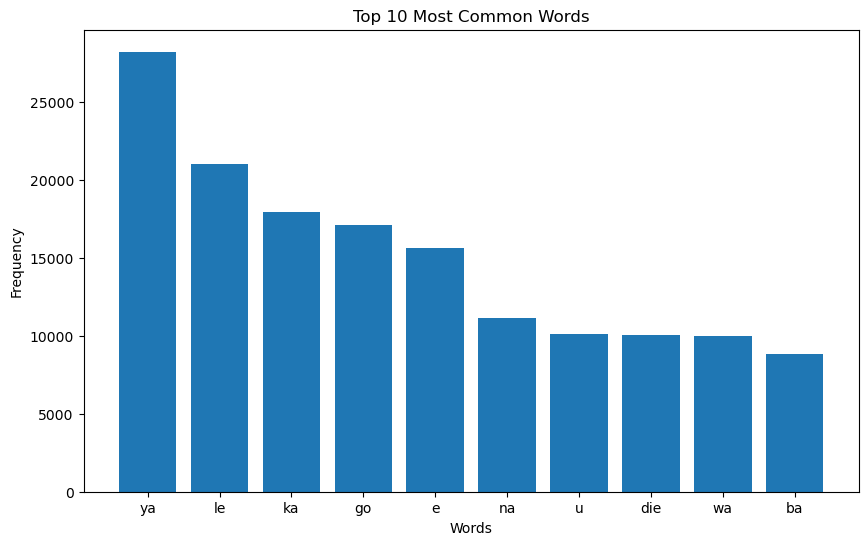

In [76]:
# Cell 6: Create a bar chart for word frequencies
plt.figure(figsize=(10, 6))
plt.bar(*zip(*word_freq.most_common(10)))
plt.title('Top 10 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

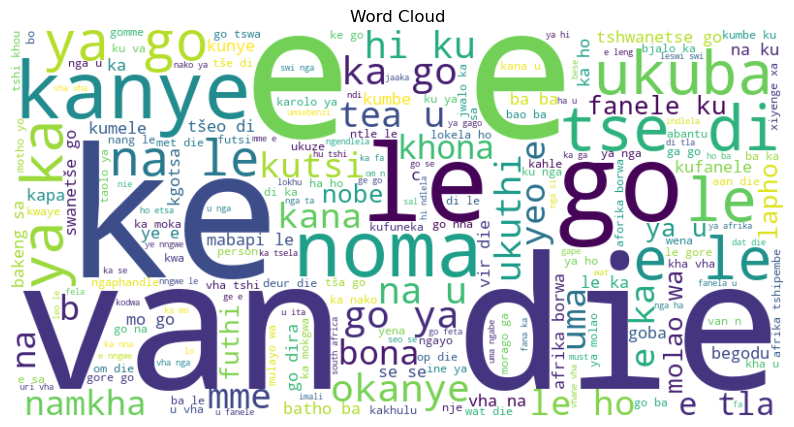

In [77]:
# Cell 7: Create a WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(filtered_words))

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()

In [78]:
from nltk import ngrams
bigrams = ngrams(words, 2)  # Change 2 to 3 for trigrams

In [79]:
# Cell 8: Extract Bigrams (you can add this cell after the previous ones)
from nltk import ngrams

# Assuming 'words' is your list of tokenized words
bigrams = list(ngrams(words, 2))  # Change 2 to 3 for trigrams

# Display the top N most common bigrams
bigram_freq = Counter(bigrams)
top_bigrams = bigram_freq.most_common(10)  # Change 10 to the desired number of top bigrams
print(f"Top 10 most common bigrams:\n{top_bigrams}")


Top 10 most common bigrams:
[(('of', 'the'), 1912), (('van', 'die'), 1773), (('e', 'e'), 1693), (('le', 'go'), 1473), (('tse', 'di'), 1171), (('e', 'le'), 1056), (('ya', 'go'), 1017), (('ya', 'ka'), 1012), (('na', 'le'), 977), (('go', 'ya'), 921)]


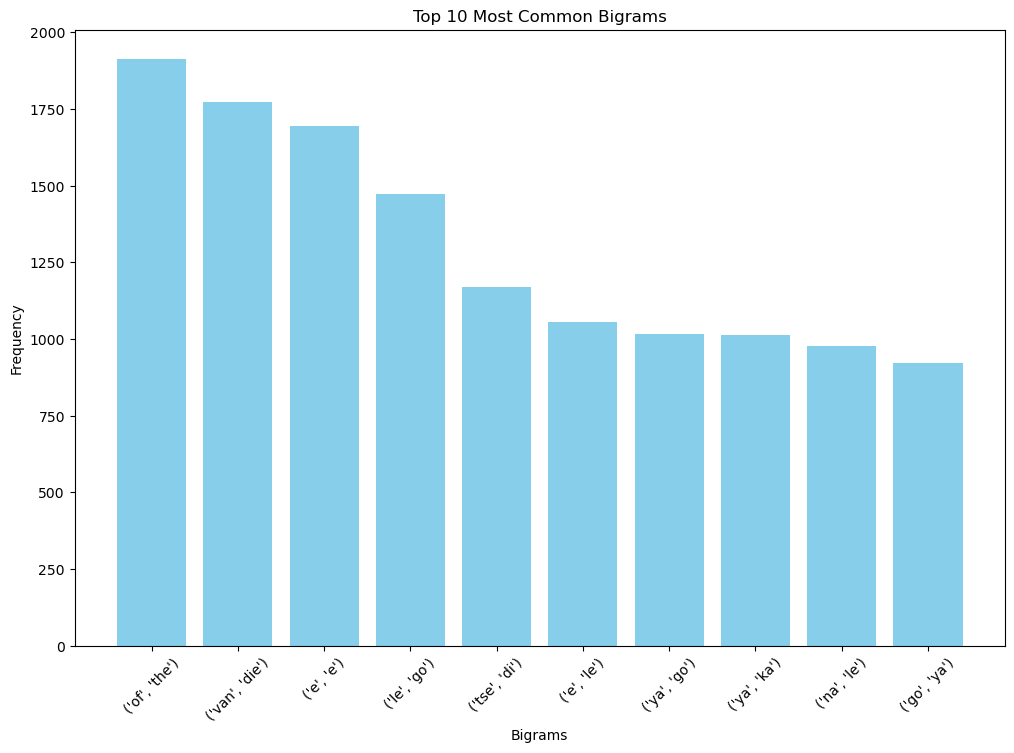

In [82]:
# Cell 9: Visualization of Bigrams (replace the previous Cell 9)
# Create a bar chart for bigram frequencies
plt.figure(figsize=(12, 8))

# Unpack bigrams and their frequencies
bigram_labels, bigram_counts = zip(*top_bigrams)

# Plot the bar chart
plt.bar(range(len(bigram_labels)), bigram_counts, color='skyblue')

# Set x-axis ticks and labels
plt.xticks(range(len(bigram_labels)), bigram_labels, rotation=45)

plt.title('Top 10 Most Common Bigrams')
plt.xlabel('Bigrams')
plt.ylabel('Frequency')
plt.show()

In [85]:
# Import necessary libraries
from textblob import TextBlob

# Assuming you have a DataFrame named 'train_df' with a 'text' column
# Add a new column for sentiment polarity
train_df['sentiment_polarity'] = train_df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Add a new column for sentiment category (positive, negative, neutral)
train_df['sentiment_category'] = train_df['sentiment_polarity'].apply(lambda x: 'positive' if x > 0 else 'negative' if x < 0 else 'neutral')

# Display the DataFrame with sentiment analysis results
print(train_df[['text', 'sentiment_polarity', 'sentiment_category']])


                                                    text  sentiment_polarity  \
0      umgaqo-siseko wenza amalungiselelo kumaziko ax...               0.000   
1      i-dha iya kuba nobulumko bokubeka umsebenzi na...               0.000   
2      the province of kwazulu-natal department of tr...               0.450   
3      o netefatša gore o ba file dilo ka moka tše le...               0.000   
4      khomishini ya ndinganyiso ya mbeu yo ewa maana...               0.000   
...                                                  ...                 ...   
32995  popo ya dipolateforomo tse ke go tlisa boetele...               0.000   
32996  modise mosadi na o ntse o sa utlwe hore thaban...               0.000   
32997  closing date for the submission of completed t...               0.075   
32998  nawuphina umntu ofunyenwe enetyala phantsi kwa...               0.000   
32999  mafapha a mang le ona a lokela ho etsa ditlale...               0.000   

      sentiment_category  
0           

# 4.Feature Engineering 

# 5.Modeling

In [142]:

# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(train_df['text'], train_df['lang_id'], test_size=0.2, random_state=42)

# Use TfidfVectorizer to convert text to numerical features
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_valid_tfidf = tfidf_vectorizer.transform(X_valid)

# Train a simple Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_tfidf, y_train)

# Predict on the validation set
y_pred = model.predict(X_valid_tfidf)

# Evaluate the model
f1 = f1_score(y_valid, y_pred, average='weighted')
print(f"Logistic Regression F1 Score: {f1}")

C:\Users\Mohau\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression F1 Score: 0.9887976472563417


In [131]:

# Use the same TfidfVectorizer to convert test data to numerical features
X_test_tfidf = tfidf_vectorizer.transform(test_df['text'])

# Make predictions on the test set
test_predictions = model.predict(X_test_tfidf)

# Create a DataFrame for submission
submission_df = pd.DataFrame({'index': test_df['index'], 'lang_id': test_predictions})

# Save the submission file
submission_df.to_csv('submission.csv', index=False)

In [90]:
# Train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_tfidf, y_train)

# Evaluate Random Forest model
y_pred_rf = rf_model.predict(X_valid_tfidf)
f1_rf = f1_score(y_valid, y_pred_rf, average='weighted')
print(f"Random Forest F1 Score: {f1_rf}")

Random Forest F1 Score: 0.9740879076434784


In [93]:
# Predict using the Random Forest model
test_predictions_rf = rf_model.predict(X_test_tfidf)

# Create a submission DataFrame
submission_rf = pd.DataFrame({'index': test_df['index'], 'lang_id': test_predictions_rf})

# Save the submission to a CSV file
submission_rf.to_csv('submission_rf.csv', index=False)


In [92]:
# Train Multinomial Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# Evaluate Multinomial Naive Bayes model
y_pred_nb = nb_model.predict(X_valid_tfidf)
f1_nb = f1_score(y_valid, y_pred_nb, average='weighted')
print(f"Multinomial Naive Bayes F1 Score: {f1_nb}")

Multinomial Naive Bayes F1 Score: 0.9927226276451484


In [94]:
# Predict using the Multinomial Naive Bayes model
test_predictions_nb = nb_model.predict(X_test_tfidf)

# Create a submission DataFrame
submission_nb = pd.DataFrame({'index': test_df['index'], 'lang_id': test_predictions_nb})

# Save the submission to a CSV file
submission_nb.to_csv('submission_nb.csv', index=False)

In [115]:
nb_model = MultinomialNB(alpha=0.1)  # You can try different alpha values
nb_model.fit(X_train_tfidf, y_train_encoded)


MultinomialNB(alpha=0.1)

In [116]:
test_predictions = nb_model.predict(X_test_tfidf)

# Step 9: Decode the predictions back to original labels
test_predictions_labels = label_encoder.inverse_transform(test_predictions)

# Step 10: Calculate the F1 score
f1_nb = f1_score(y_test, test_predictions_labels, average='weighted')

# Step 11: Print the F1 score
print(f"F1 Score (Multinomial Naive Bayes): {f1_nb}")

F1 Score (Multinomial Naive Bayes): 0.9990909140677504


In [117]:
X_submission_tfidf = tfidf_vectorizer.transform(test_df['text'])

# Step 13: Make predictions on the test set for Kaggle submission
submission_predictions = nb_model.predict(X_submission_tfidf)

# Step 14: Decode the predictions back to original labels
submission_predictions_labels = label_encoder.inverse_transform(submission_predictions)

# Step 15: Create a submission DataFrame
submission_df = pd.DataFrame({'index': test_df['index'], 'lang_id': submission_predictions_labels})

# Step 16: Save the submission to a CSV file
submission_df.to_csv('submission_nb.csv', index=False)